<h1>Visualisation</h1>

<h2>Histogrammes</h2>

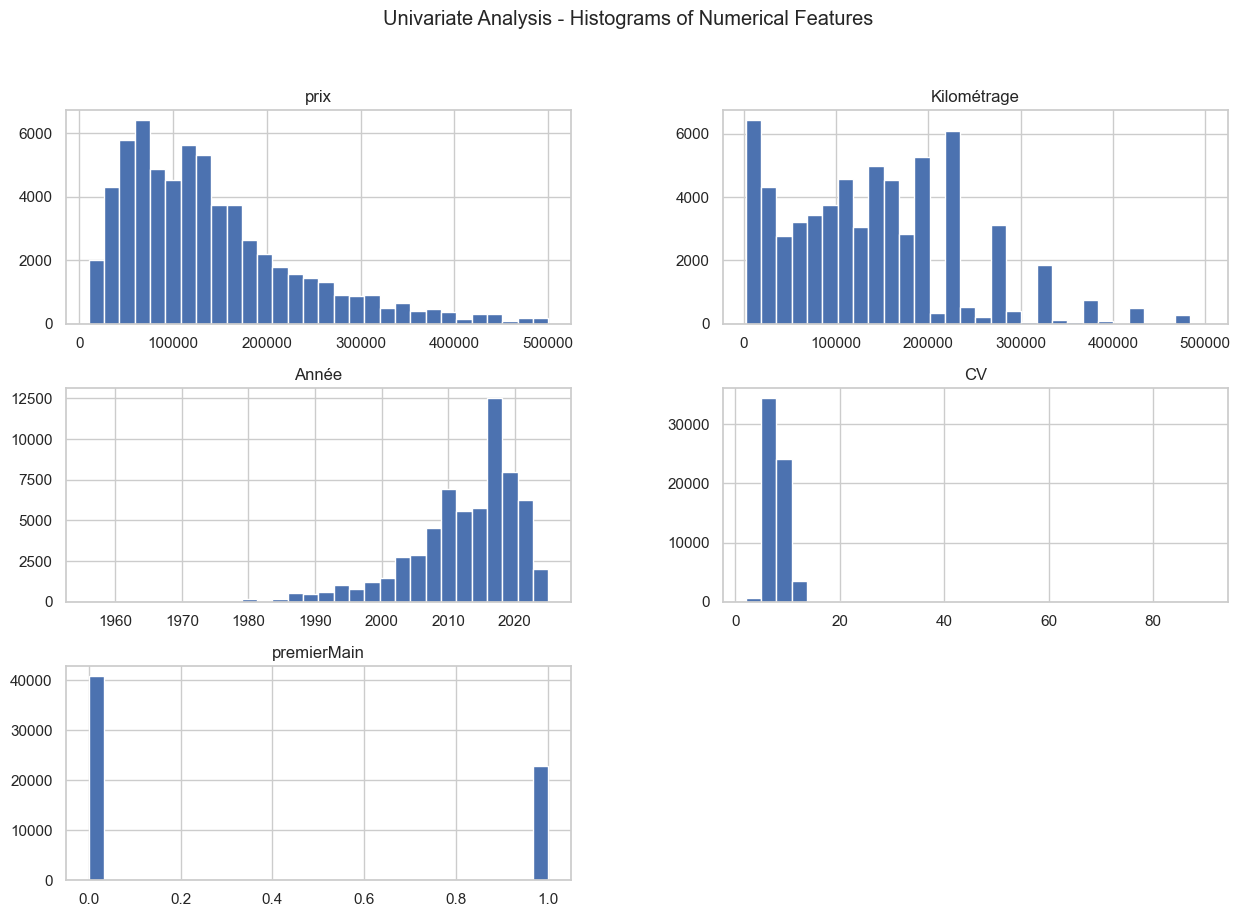

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Last_version.csv')

# Set aesthetic style
sns.set(style="whitegrid")

df.select_dtypes(include=['number']).hist(bins=30, figsize=(15, 10))
plt.suptitle('Univariate Analysis - Histograms of Numerical Features')
plt.show()





In [75]:
maximum = df['Kilométrage'].max()
maximum

499978

<h2>Matrice de correlation(heatmap)</h2>

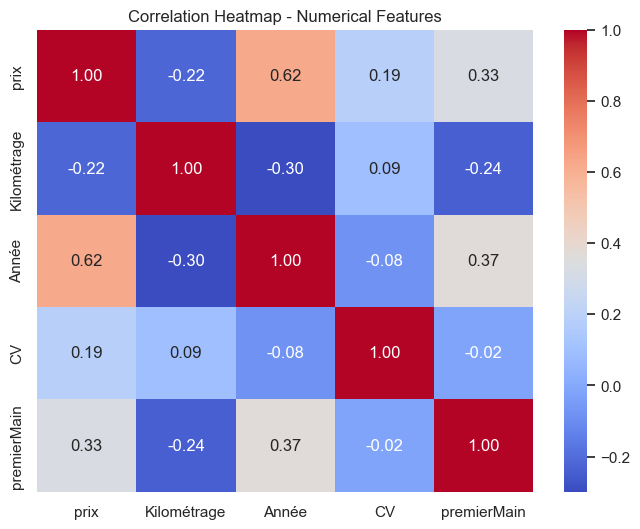

In [76]:
# Compute correlations with price
num_df = df.select_dtypes(include='number')
correlations = num_df.corr()['prix'].drop('prix').abs().sort_values(ascending=False)


# Correlation heatmap for all numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

<h2>Nuage du Point</h2>

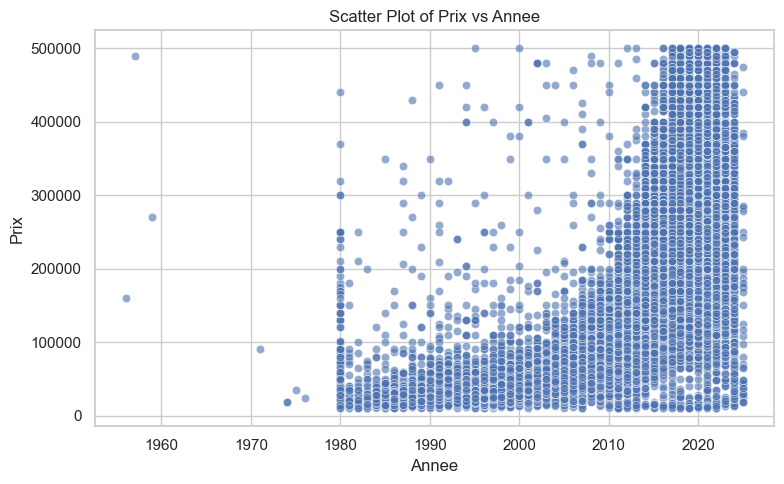

In [77]:
num_df = df.select_dtypes(include='number')
correlations = num_df.corr()['prix'].drop('prix').abs().sort_values(ascending=False)

# Top 4 features most correlated with 'prix'
top_features = correlations.head(4).index.tolist()

# Create individual scatter plots

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Année'], y=df['prix'], alpha=0.6)
plt.title(f'Scatter Plot of Prix vs Annee')
plt.xlabel('Annee')
plt.ylabel('Prix')
plt.tight_layout()
plt.show()

<h2>Boite a moustache</h2>

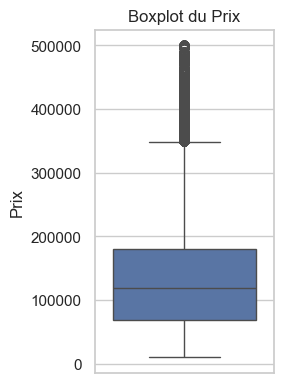

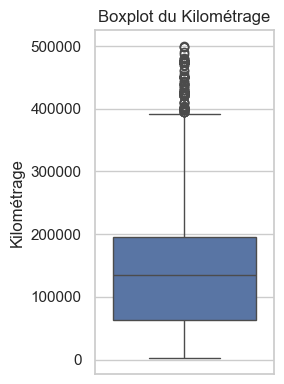

In [78]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df['prix'])
plt.title('Boxplot du Prix')
plt.ylabel('Prix')
plt.tight_layout()
plt.show()

# Boxplot du kilométrage
plt.figure(figsize=(3, 4))
sns.boxplot(y=df['Kilométrage'])
plt.title('Boxplot du Kilométrage')
plt.ylabel('Kilométrage')
plt.tight_layout()
plt.show()



C:\Users\Othman SALAHI\AppData\Local\Temp\ipykernel_20316\3783303358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='marque',data=df,palette='hls', ax=ax)


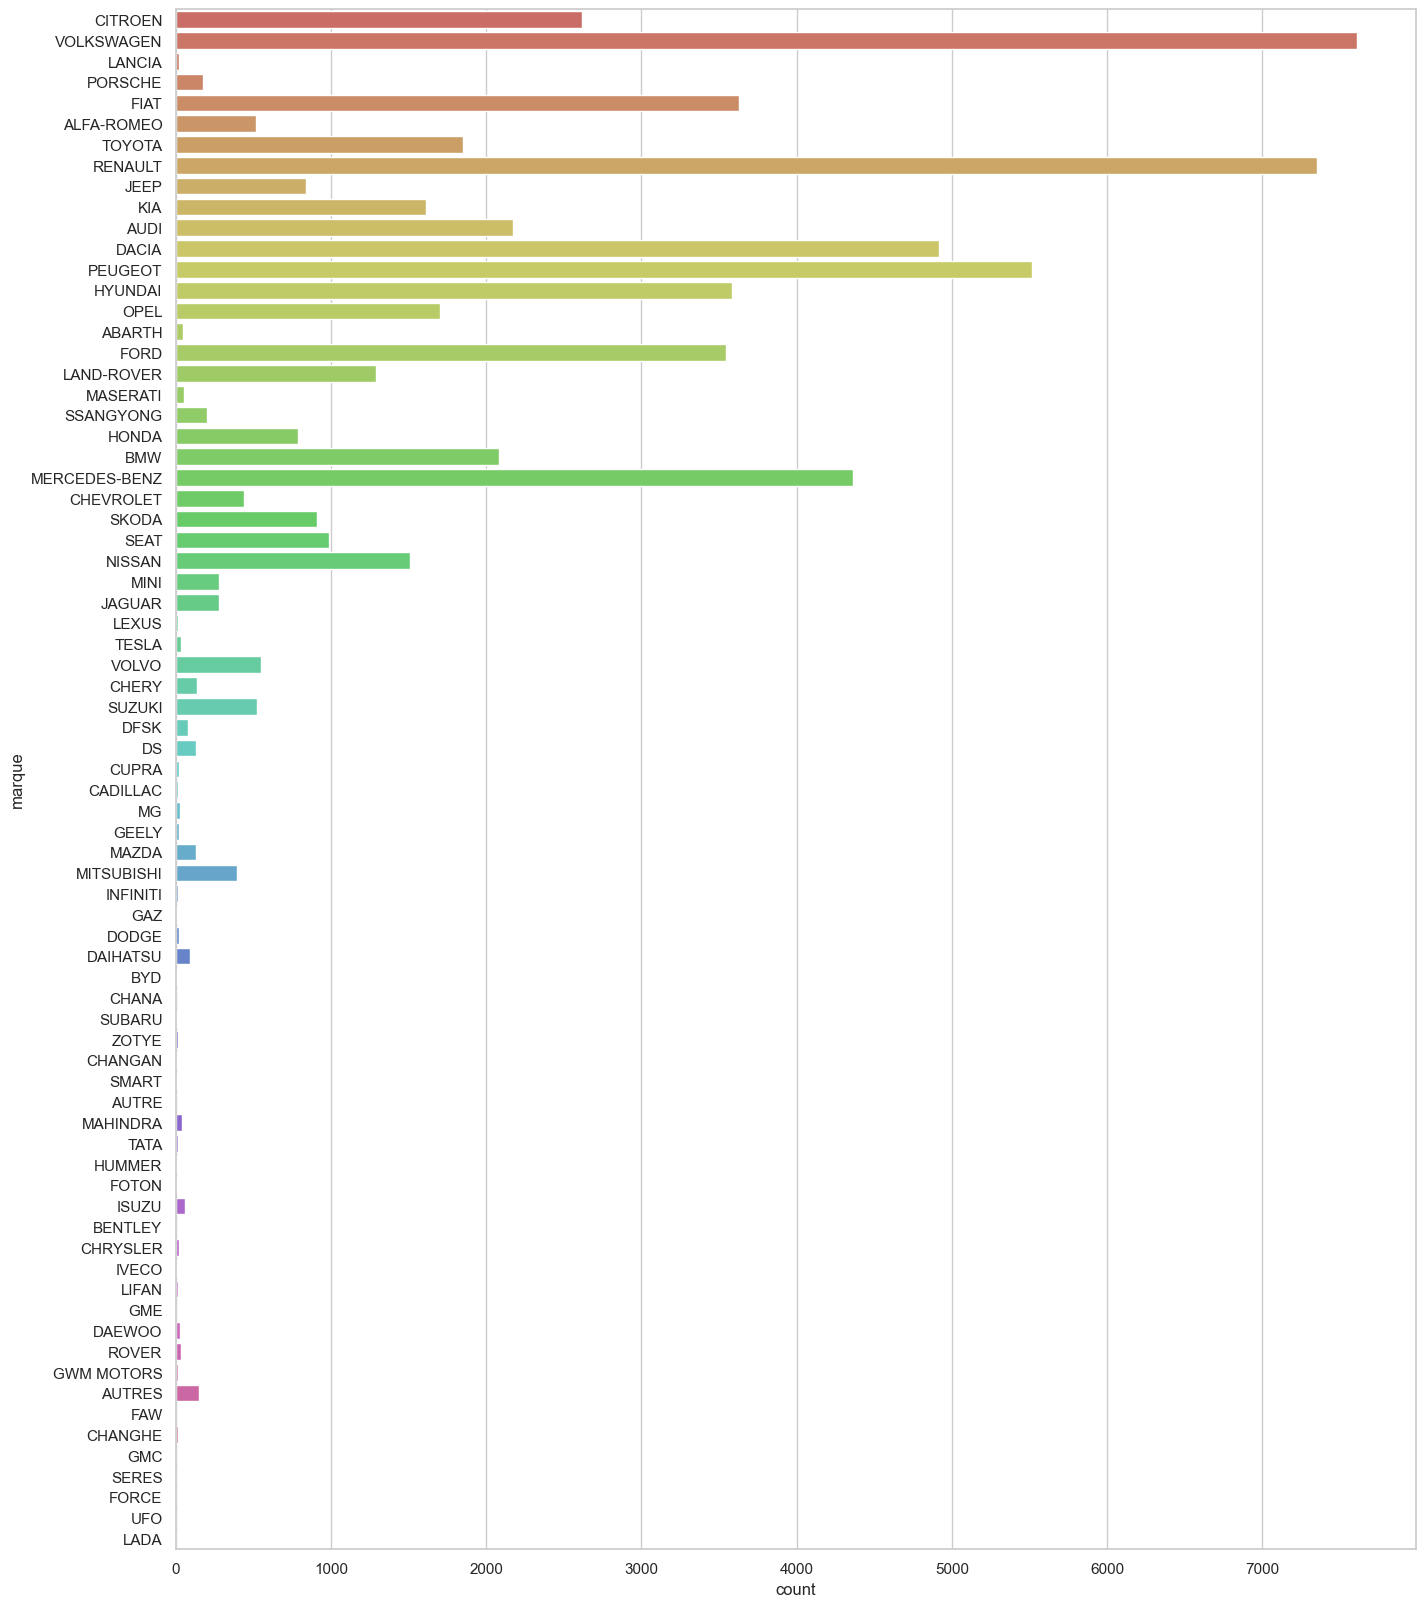

In [79]:
fig, ax = plt.subplots(figsize=(16, 20))
sns.countplot(y='marque',data=df,palette='hls', ax=ax)
plt.show()

In [80]:
# Count how many times each marque appears
marque_counts = df['marque'].value_counts()

# Identify marques that appear at least 5 times
rare_marques = marque_counts[marque_counts <= 100].index

print(df[df['marque'].isin(rare_marques)])

valid_marques = marque_counts[marque_counts >= 100].index


# Keep only rows with those marques
df = df[df['marque'].isin(valid_marques)]


         prix  Kilométrage  Année Transmission Carburant  CV  premierMain  \
2      185000       159000   2013  Automatique    Diesel  12            1   
25     145000        45000   2014  Automatique   Essence   8            0   
29     199000       119000   2014  Automatique    Diesel  11            0   
41     283000         4000   2024  Automatique   Essence   8            0   
94     450000        49000   2023  Automatique   Hybride  14            1   
...       ...          ...    ...          ...       ...  ..          ...   
63188   57000       224999   2007     Manuelle   Essence  10            0   
63268   70000       374999   2008  Automatique    Diesel   6            0   
63335  250000       114999   2016  Automatique    Diesel  12            0   
63373   70000       274999   2004     Manuelle    Diesel   9            0   
63460   27000       164999   2010     Manuelle   Essence   5            0   

           marque         modele  
2          LANCIA          THEMA  
25   

In [81]:
df = df[df['marque'] != 'AUTRES']

In [82]:
df = df[df['prix'] > 40000]

C:\Users\Othman SALAHI\AppData\Local\Temp\ipykernel_20316\3783303358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='marque',data=df,palette='hls', ax=ax)


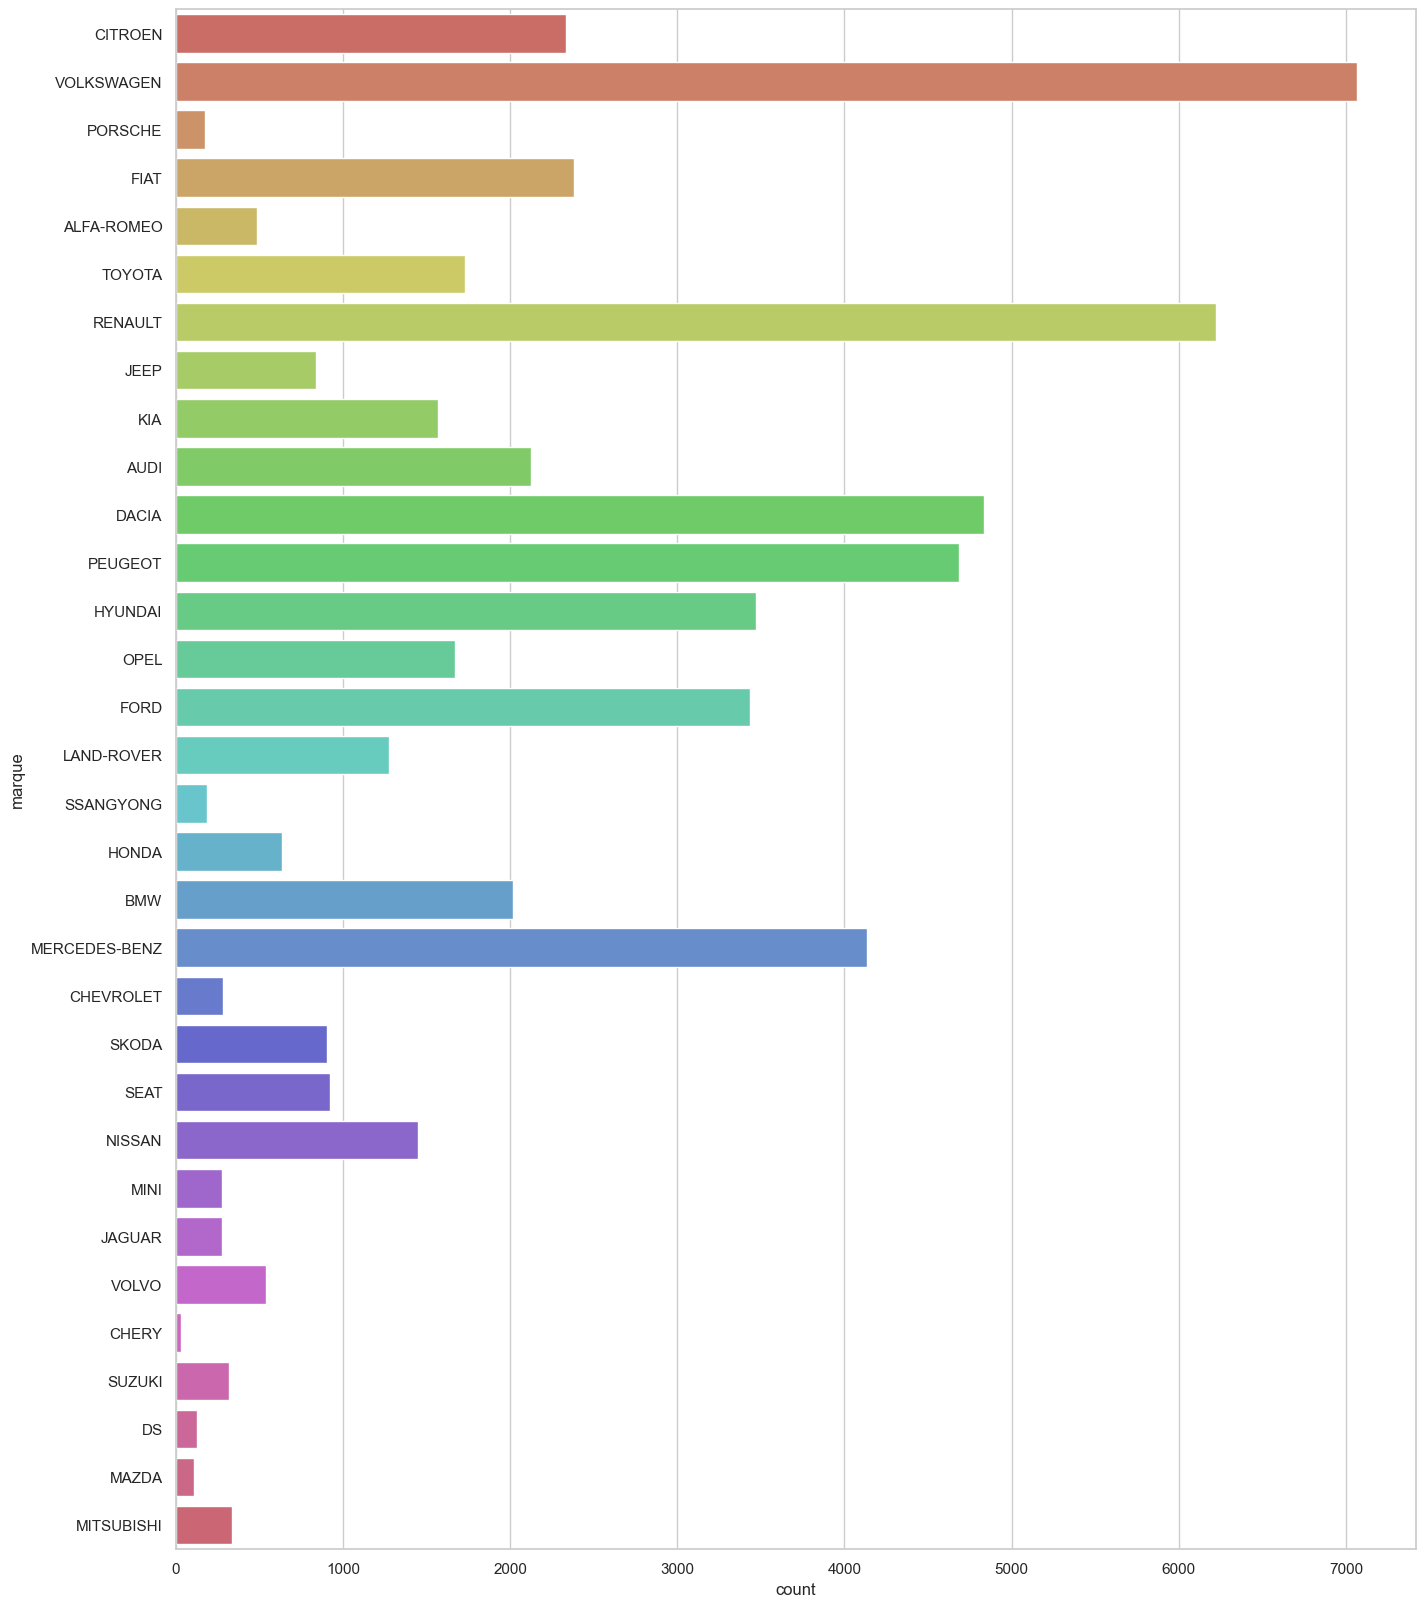

In [83]:
fig, ax = plt.subplots(figsize=(16, 20))
sns.countplot(y='marque',data=df,palette='hls', ax=ax)
plt.show()

In [84]:
df.shape

(56858, 9)

In [85]:
df.to_csv('final_version.csv')

In [86]:
filtered_df = df[(df['modele'] == 'LOGAN') & (df['Année'] > 2020) & (df['prix'] < 70000)]
print(filtered_df)

        prix  Kilométrage  Année Transmission Carburant  CV  premierMain  \
20898  66000       274999   2025     Manuelle    Diesel   6            0   
31076  45000         2499   2024     Manuelle    Diesel   6            0   

      marque modele  
20898  DACIA  LOGAN  
31076  DACIA  LOGAN  
